<IPython.core.display.Javascript object>


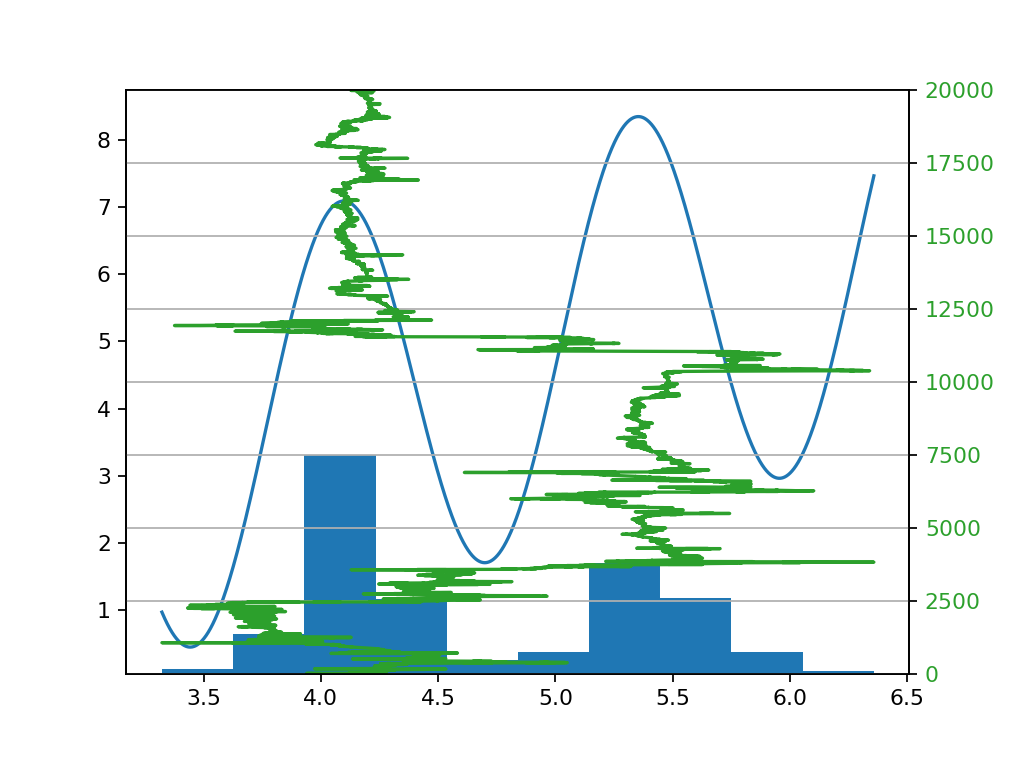

<IPython.core.display.Javascript object>


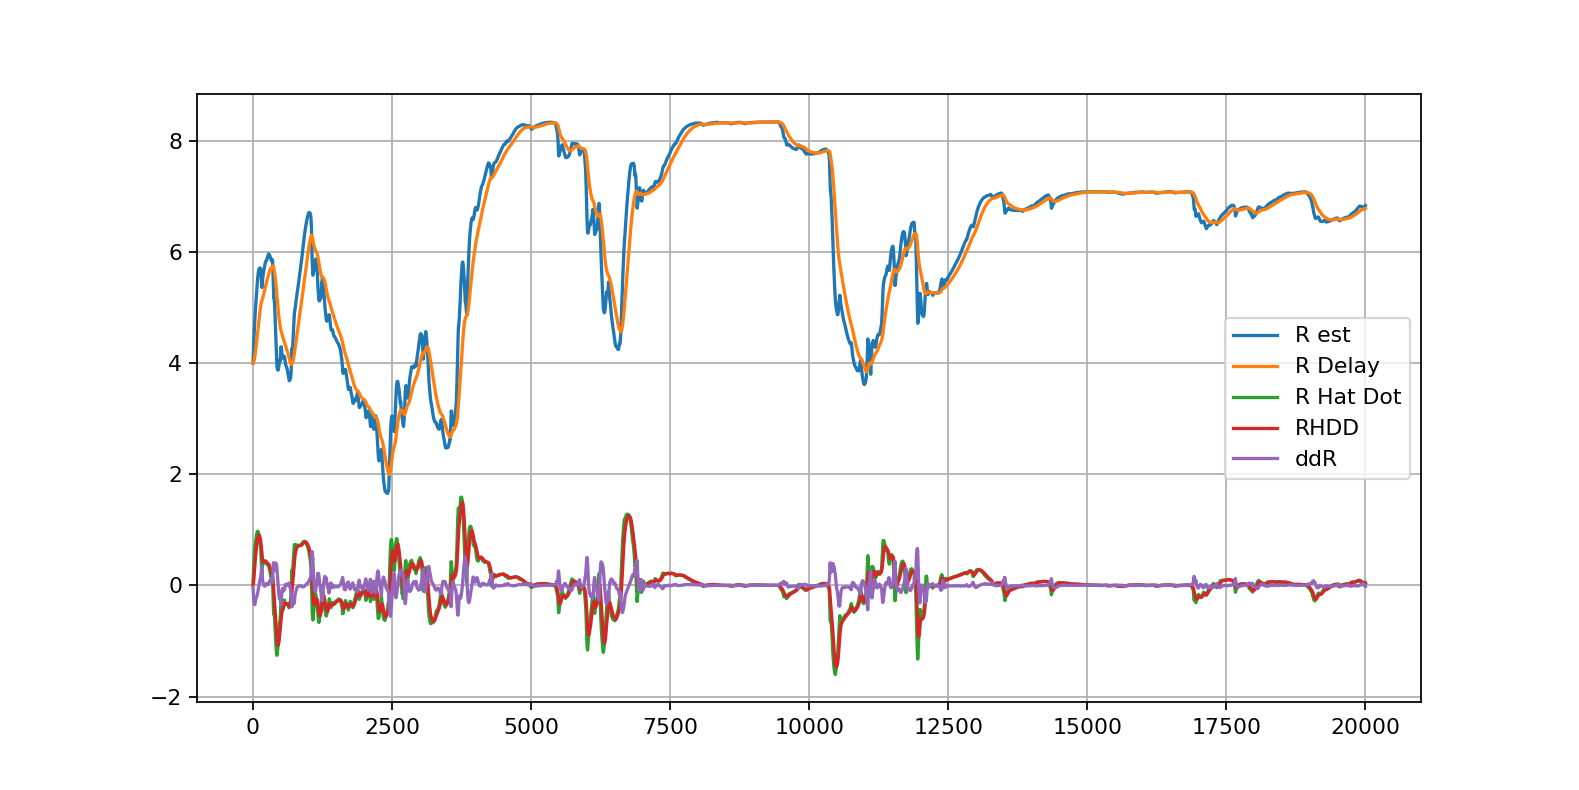

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Helper function: sigmoid
def sigmoid(x, amp=20, ceiling=1):
    return ceiling / (1 + np.exp(-amp * x))

# Derivative function
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# Second derivative function
def second_derivative(f, x, h=1e-5):
    return (f(x + 2*h) - 2*f(x + h) + f(x)) / h**2

def pos_derivative(x, xh, h):
    return (xh - x) / h
# Simulated annealing schedule
def simulated_annealing_schedule(i, periodicity=100, amplitude=1):
    return amplitude * (i % periodicity == 0)

# Reward function
def reward(x, dt=0.1):
    if x < 10:
        return 3*np.sin(5*x) + x # Updated the function as per your request
    else:
        return -x

# Initial state
x = 4

# Noise parameters
c = 0.1
# np.random.seed(0)  # For reproducibility

dt = 0.1

reward_vals = [reward(x)]
R_est = R_delay = 4
R_est_vals = [R_est]
R_delay_vals = [R_delay]

dRdT_vals = [0, 0]
dR_vals = [0]

X_est = X_delay = x

X_est_vals = []
X_delay_vals = []

R_hat_dot_delay = 0
dR_hat_dot_delay = 0
R_hat_dot_delay_vals=[]
X_hat_dot_vals = []
R_hat_dot_vals = []
ddR_vals = []

# Create a list to store the path
path = [x]
tau = 10
num_steps = 20000
# Hill climbing iterations
for i in range(num_steps):
    # Store the current state in the path
    path.append(x)

    # Calculate the derivatives
    # dw = pos_derivative(path[-2], path[-1], dt)
    
    # dR = derivative(reward, x)
    # TODO: fix reward rate 
    s = reward(x)
    # r = (s - reward_vals[-1])/dt
    reward_vals.append(s)
    
    dX_est = (1/tau) * (x - X_est)
    dX_delay = (1/tau) * (X_est - X_delay)
    
    X_est += (dX_est*dt)
    X_delay += (dX_delay*dt)
    
    X_est_vals.append(X_est)
    X_delay_vals.append(X_delay)
    
    X_hat_dot = X_est-X_delay
    X_hat_dot_vals.append(X_hat_dot)

    # dX = (1/tau) * (-x + (X_est - X_delay)) # or dX = X_est - X_delay
    
    dR_est = (1/tau) * (s - R_est)
    dR_delay = (1/tau) * (R_est - R_delay)
    
    R_est += (dR_est*dt)
    R_delay += (dR_delay*dt)
    
    R_est_vals.append(R_est)
    R_delay_vals.append(R_delay)
    
    R_hat_dot = R_est - R_delay
    R_hat_dot_vals.append(R_hat_dot)
    
    # second derivative
    dR_hat_dot_delay = (1/(.25*tau)) * (R_hat_dot - R_hat_dot_delay)
    R_hat_dot_delay += dR_hat_dot_delay*dt
    
    R_hat_dot_delay_vals.append(R_hat_dot_delay)
    
    ddR = R_hat_dot_delay - R_hat_dot
    ddR_vals.append(ddR)
    # X_double_dot = ((1/tau) * 
    # dRdT = (1/tau) * (s-r) # X_est = 1/tau * (x - X_est)
    
    
    # dRdT_vals.append(dRdT)
    # dR_vals.append(dR)
    
    # d2R = second_derivative(reward, x)
    # d2R = pos_derivative(dR_vals[-2],dR_vals[-1],dt)
    
    # Update the position (hill climbing step)
    # dx = np.sign(dR)
    
    # Add the noise term
    # reward_sigmoid = sigmoid(d2R)
    
    # noise = reward_sigmoid * np.random.normal()
    # if i % 100 == 0:
    #     print(noise)
    ceiling = 0.1
    dXdt = sigmoid(X_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling) # ((dw * dR) * dt) + c * noise # (c * np.random.normal(0, dt)) + noise 
    # (X_hat_dot * R_hat_dot) + c*np.random.normal(0,np.sqrt(dt))
    
    # Add the simulated annealing term
    # dx += simulated_annealing_schedule(i, periodicity=100, amplitude=0.1)

    # Update the position
    c = 0.01 + (1-abs(R_hat_dot))*ddR # 1/X_hat_dot
    
    x += (dXdt * dt) + c*np.random.normal(0,np.sqrt(dt))

# Create a range of x values
x_values = np.linspace(min(path), max(path), num_steps)

# Create a corresponding list of reward values
reward_values = [reward(x) for x in x_values]
fig, ax1 = plt.subplots()
y_lim = 10
# Plot the reward function
# plt.figure(figsize=(y_lim, 5))
ax1.plot(x_values, reward_values)

ax2 = ax1.twinx()
time = np.linspace(0,num_steps,len(path))
ax2.plot(path, time, color='tab:green')
plt.grid(True)
ax2.set_ylim(0,num_steps)
ax2.tick_params(axis ='y', labelcolor = 'tab:green')
ax2.hist(path)
plt.show()

# Plot the path of the iteration
plt.figure(figsize=(10, 5))
plt.plot(R_est_vals, label='R est')
plt.plot(R_delay_vals, label="R Delay")
plt.plot(R_hat_dot_vals, label="R Hat Dot")
plt.plot(R_hat_dot_delay_vals, label='RHDD')
plt.plot(ddR_vals, label="ddR")

# plt.plot(X_hat_dot_vals, label="X Hat Dot")
# plt.plot(X_delay_vals, label="x_delay")
# plt.plot(path, label="x")
plt.grid()
plt.legend()
# plt.plot(path, range(len(path)))
# plt.title('Path of the Iteration Over Time')
# plt.xlabel('x')
# plt.ylabel('Iteration')
# plt.grid(True)
# plt.gca().invert_yaxis()  # Invert y-axis so that time moves upwards
# plt.show()



In [58]:
ax1.set_ylim([0,3000])

(0.0, 3000.0)

In [107]:
# Form a histogram of x's positions over multiple runs, superimposed over each other 
# Try to implement it in 2 dimensions. An X actor optimizes over x, a y actor optimizes over y, each has their own parameters

In [91]:
# apply method to sin wave, see that derivative is cos and second derivative is negative sin. See how time constant needs to change and how eto use that to leave valleys
# Adaptive noise
# dR/dt is near 0, but d2R/dt2 > 0, then youre at minimum, so boost noise
# if dR/dt ~ 0
# c = c+d2R/dt2

<IPython.core.display.Javascript object>


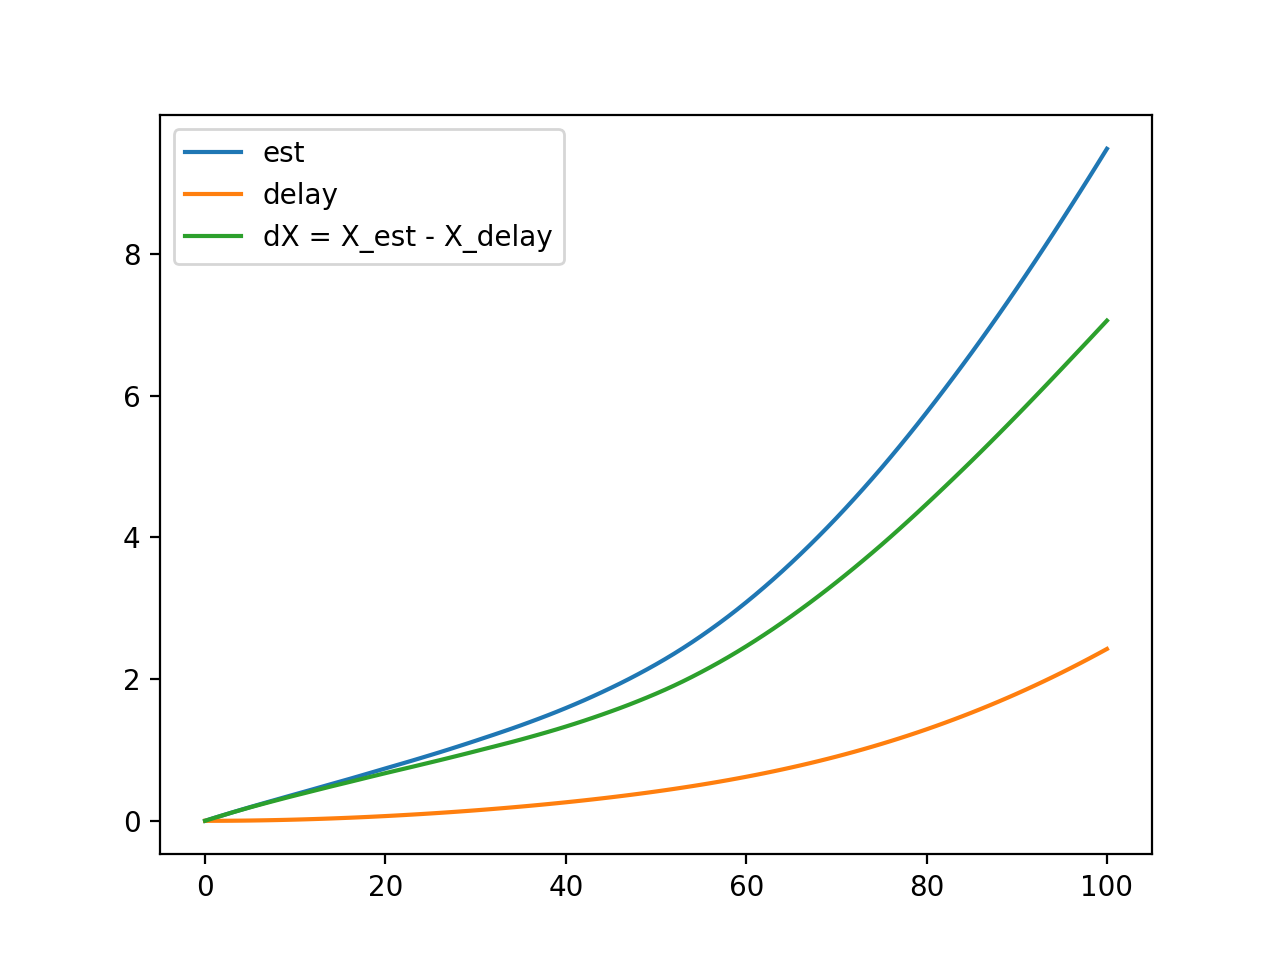

In [179]:
plt.figure()
plt.plot(X_est_vals, label='est')
plt.plot(X_delay_vals, label='delay')
plt.plot(np.array(X_est_vals) - np.array(X_delay_vals), label='dX = X_est - X_delay')
plt.legend()

<IPython.core.display.Javascript object>


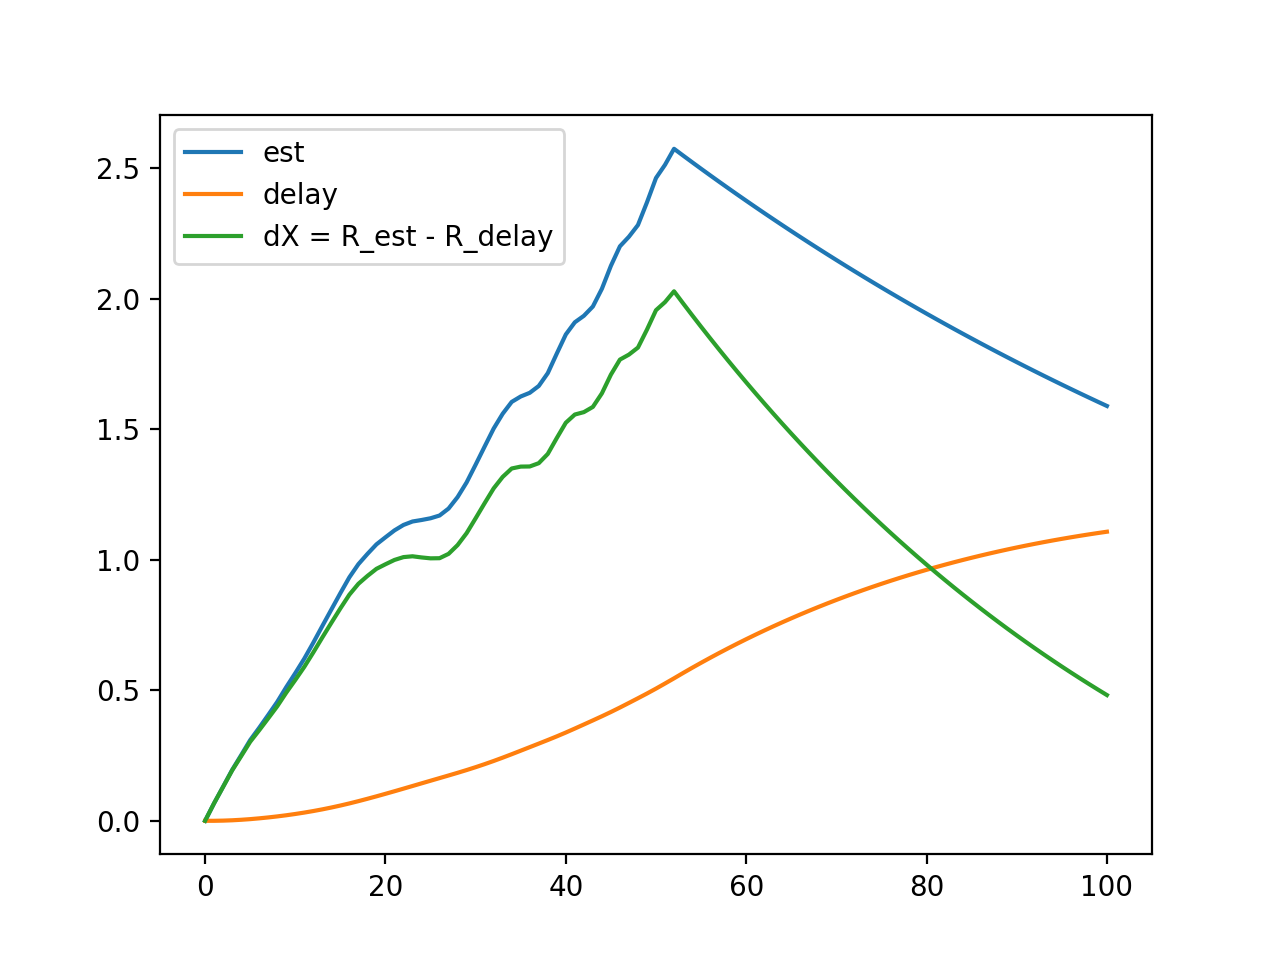

In [180]:
plt.figure()
plt.plot(R_est_vals, label='est')
plt.plot(R_delay_vals, label='delay')
plt.plot(np.array(R_est_vals) - np.array(R_delay_vals), label='dX = R_est - R_delay')
plt.legend()